In [20]:
import pandas as pd
import numpy as np

In [21]:
train_df = pd.read_csv("C://Users//hp//Google Drive//CPE646//final//train.csv//train.csv")
test_df = pd.read_csv("C://Users//hp//Google Drive//CPE646//final//test.csv//test.csv")

In [22]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [23]:
test_df.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [6]:
#import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.apionly as sns

In [28]:
qids = pd.Series(train_df['qid1'].tolist() + train_df['qid2'].tolist())

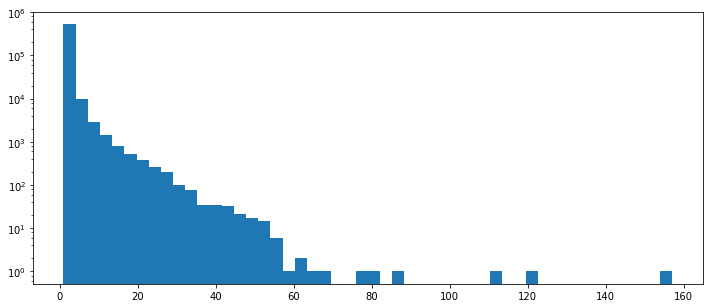

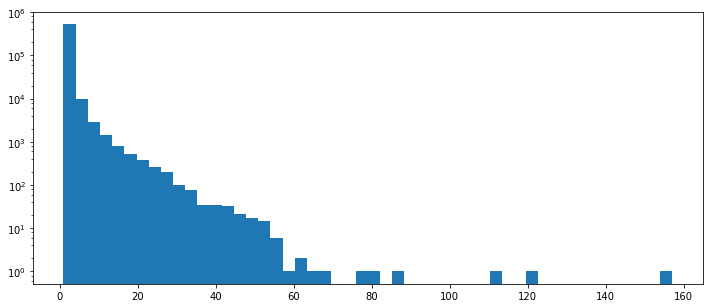

In [26]:
plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.show()

In [5]:
is_du = train_df.is_duplicate.value_counts()
is_du[1]

149263

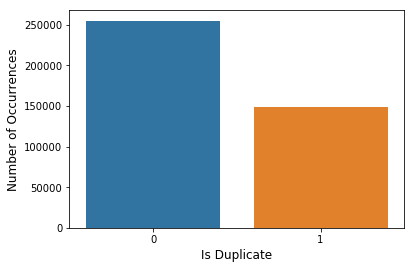

In [7]:
# sns.set_style("whitegrid")
sns.barplot(is_du.index,is_du.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Is Duplicate', fontsize=12)
plt.show()

In [8]:
all_ques_df = pd.DataFrame(pd.concat([train_df['question1'], train_df['question2']]))
all_ques_df.columns = ["questions"]

In [9]:
all_ques_df.head()

,questions
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [10]:
all_ques_df['num'] = all_ques_df.questions.apply(lambda x: len(str(x).split(' ')))

In [11]:
all_ques_df.num.values

array([14,  8, 14, ...,  3, 25, 10], dtype=int64)

In [12]:
num_words = all_ques_df.num.value_counts()

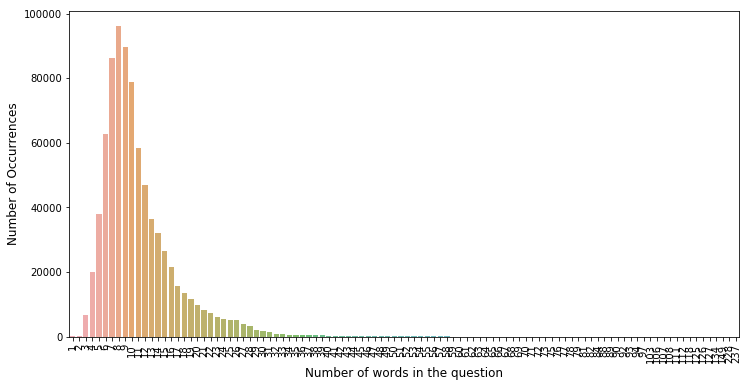

In [13]:
plt.figure(figsize=(12,6))
sns.barplot( num_words.index,num_words.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of words in the question', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [14]:
from nltk import word_tokenize

In [15]:
from nltk.corpus import stopwords

In [16]:
eng_stopwords = set(stopwords.words('english'))

In [17]:
def get_unigrams(que):
    return [word for word in word_tokenize(que.lower()) if word not in eng_stopwords]

def get_common_unigrams(row):
    return len( set(row["unigrams_ques1"]).intersection(set(row["unigrams_ques2"])) )

def get_common_unigram_ratio(row):
    return float(row["unigrams_common_count"]) / max(len( set(row["unigrams_ques1"]).union(set(row["unigrams_ques2"])) ),1)

train_df["unigrams_ques1"] = train_df['question1'].apply(lambda x: get_unigrams(str(x)))
train_df["unigrams_ques2"] = train_df['question2'].apply(lambda x: get_unigrams(str(x)))
train_df["unigrams_common_count"] = train_df.apply(lambda row: get_common_unigrams(row),axis=1)
train_df["unigrams_common_ratio"] = train_df.apply(lambda row: get_common_unigram_ratio(row), axis=1)



In [18]:
train_df

,id,qid1,qid2,question1,question2,is_duplicate,unigrams_ques1,unigrams_ques2,unigrams_common_count,unigrams_common_ratio
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[step, step, guide, invest, share, market, ind...","[step, step, guide, invest, share, market, ?]",6,0.857143
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[story, kohinoor, (, koh-i-noor, ), diamond, ?]","[would, happen, indian, government, stole, koh...",6,0.461538
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns, ?]",3,0.300000
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[mentally, lonely, ?, solve, ?]","[find, remainder, [, math, ], 23^, {, 24, }, [...",1,0.062500
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[one, dissolve, water, quikly, sugar, ,, salt,...","[fish, would, survive, salt, water, ?]",3,0.200000
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,"[astrology, :, capricorn, sun, cap, moon, cap,...","['m, triple, capricorn, (, sun, ,, moon, ascen...",5,0.312500
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,"[buy, tiago, ?]","[keeps, childern, active, far, phone, video, g...",1,0.100000
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,"[good, geologist, ?]","[great, geologist, ?]",2,0.500000
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,"[use, シ, instead, し, ?]","[use, ``, &, '', instead, ``, '', ?]",3,0.375000
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,"[motorola, (, company, ), :, hack, charter, mo...","[hack, motorola, dcx3400, free, internet, ?]",4,0.333333


In [32]:
from wordcloud import WordCloud


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(all_ques_df.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')